# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as st

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


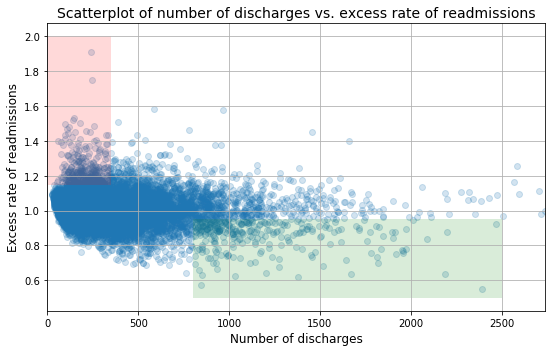

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
# https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
  + There does not appear to be a significant negative linear relationship between "Number of discharges" and "Excess rate of readmissions". The green and red areas show outlier data.
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
  + Yes, for outlier data. No, for the entire dataset. If we look at the area under a rate of .85, there are very few occurrences under 300 discharges and the deviations from 1 are smaller than in the red area. However, the vast majority of occurrences hover around a rate of 1.0 and don't appear to have a linear relationship.
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
  + No. If we look at the area over a rate of 1.05 between 800 and 2500 discharges, there are about the same number of occurrences as below, but the deviations from 1 are smaller than in the green area. These areas represent outliers.

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 
  + The statistics above suggest that a hospital with a higher number of discharges has a lower readmissions.

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
  + We would need to study the complete data set (including discharges between 100 and 1000) in order to make this conclusion.
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
  + Outlier small hospitals with higher readmission rates may be lacking resources, but the majority of small capacity hospitals have typical readmission rates.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
  + There are only some small capacity hospitals which have higher readmission rates. Rather than adding policy requirements for all small capacity hospitals, we can do further research to figure out what other variables are causing some small capacity hospitals to have higher readmission rates, while others have standard rates.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
  + Most small capacity hospitals don't have significantly higher readmission rates than higher capacity hospitals, so developing this plan is not likely to be beneficial.
  

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not? <br>
+  See responses written in cell above.
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
       * Initially I was considering that the initivate to provide additional incentives for small capacity hospitals could be marginally beneficial. Now, I believe that the outlier behavior is due to other variables besides hospital capacity.
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
        * We can see each individual data point as an observation.
        * The highlighted areas show a bias towards creating analysis based on outliers behavior.
        * We cannot see a regression line or confidence interval to display correlation and confidence.
        * It is difficult to tell how many more points are centered at 1.0. This is a limit of using alpha with large datasets.
      - Construct another plot that conveys the same information in a more direct manner.

You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Pearson correlation coefficient hypothesis test:
* Ho: There is no correlation between "Number of Discharges" and "Excess rate of readmissions".
* Ha: There is a correlation between "Number of Discharges" and "Excess rate of readmissions".

In [5]:
#Whole dataset:
alpha = .01
x = clean_hospital_read_df['Number of Discharges'][81:-3]
y = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
r, p = st.pearsonr(x, y)

print("Reject Ho because %.3f, is less than %.3f." % (p, alpha)) if p < alpha \
else print("Fail to reject Ho because of P value=%.3f is greater than alpha=%.3f." % (p, alpha))

if r > .7:
    print("The pearson correlation coefficient: %.3f indicates a strong positive linear relationship" % r) 
elif r > .3:
    print("The pearson correlation coefficient: %.3f indicates a moderate positive linear relationship" % r) 
elif r > .1:
    print("The pearson correlation coefficient: %.3f indicates a weak positive linear relationship" % r) 
elif r > -.1:
    print("The pearson correlation coefficient: %.3f indicates a negligible linear relationship." % r) 
elif r > -.3:
    print("The pearson correlation coefficient: %.3f indicates a weak negative linear relationship" % r)
elif r > -.7:
    print("The pearson correlation coefficient: %.3f indicates a strong negative linear relationship" % r) 
else:
    print("The pearson correlation coefficient: %.3f indicates a strong negative linear relationship" % r)

Reject Ho because 0.000, is less than 0.010.
The pearson correlation coefficient: -0.093 indicates a negligible linear relationship.


In [6]:
#Small capacity dataset 
chd = clean_hospital_read_df.iloc[81:-3, :]
chd = chd[(chd['Number of Discharges'] <= 300)]
x = chd['Number of Discharges']
y = chd['Excess Readmission Ratio']
r, p = st.pearsonr(x, y)
alpha = .01

print("Reject Ho because %.3f, is less than %.3f." % (p, alpha)) if p < alpha \
else print("Fail to reject Ho because of P value=%.3f is greater than alpha=%.3f." % (p, alpha))

if r > .7:
    print("The pearson correlation coefficient: %.3f indicates a strong positive linear relationship" % r) 
elif r > .3:
    print("The pearson correlation coefficient: %.3f indicates a moderate positive linear relationship" % r) 
elif r > .1:
    print("The pearson correlation coefficient: %.3f indicates a weak positive linear relationship" % r) 
elif r > -.1:
    print("The pearson correlation coefficient: %.3f indicates a negligible linear relationship." % r) 
elif r > -.3:
    print("The pearson correlation coefficient: %.3f indicates a weak negative linear relationship" % r)
elif r > -.7:
    print("The pearson correlation coefficient: %.3f indicates a strong negative linear relationship" % r) 
else:
    print("The pearson correlation coefficient: %.3f indicates a strong negative linear relationship" % r)

Reject Ho because 0.005, is less than 0.010.
The pearson correlation coefficient: -0.036 indicates a negligible linear relationship.


##### Takeaways:
* The linear relationship is negligible in both the entire dataset, and within the small capacity hospitals.
* The appearance of some kind of linear relationship in both is due to the appearance of outliers.
* If there appeared to be some kind of linear relationship, we could remove outliers and reevaluate
    * Outliers can be defined as values which are lower than Q1-1.5*IQR or higher than Q3+1.5IQR.
    * In this case, the pearson correlation coefficient would be even lower with outlier removal.

#### Scatterplot with regression line and confidence interval for entire dataset with outliers removed:

In [7]:
#### Removing outliers:
x = clean_hospital_read_df['Number of Discharges'][81:-3]
y = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

chd = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]


takind = []
def remove_outliers (df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    global iout
    iout = (df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]).index.tolist()
    for i in iout:
        if i not in takind:
            takind.append(i)
            
remove_outliers(chd, 'Excess Readmission Ratio', .25, .75)

outrm = chd.drop(index=takind)

[]

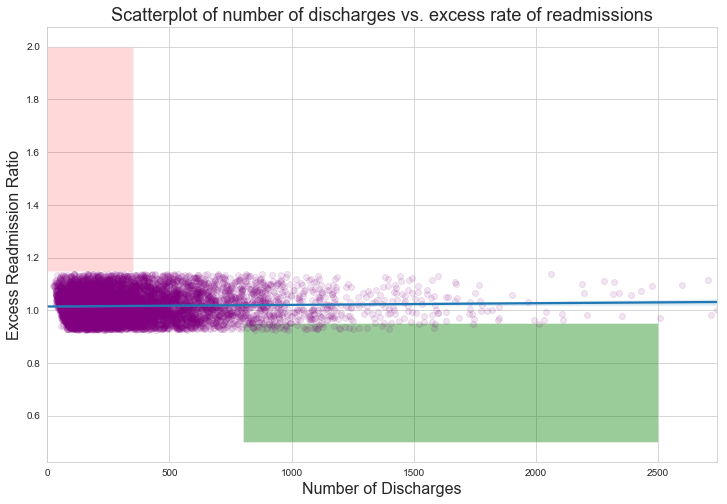

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(outrm['Number of Discharges'])])
ax.set_xlabel('Number of discharges', fontsize=16)
ax.set_ylabel('Excess rate of readmissions', fontsize=16)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=18)

ax = sns.regplot(x=outrm['Number of Discharges'], y=outrm['Excess Readmission Ratio'], ci=99, \
                 scatter_kws={'alpha':.1, 'color':'purple'}, fit_reg=True)

plt.setp(ax.collections[1], alpha=0.4)

plt.plot()


#### Scatterplot with regression line and confidence interval for small capacity hospitals (under 300 discharges) with outiers removed:

In [9]:
#Removing outliers:
chd = clean_hospital_read_df.iloc[81:-3, :]
chd = chd[(chd['Number of Discharges'] <= 300)]

takind = []
def remove_outliers (df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    global iout
    iout = (df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]).index.tolist()
    for i in iout:
        if i not in takind:
            takind.append(i)
            
remove_outliers(chd, 'Excess Readmission Ratio', .25, .75)

outrmsm = chd.drop(index=takind)

[]

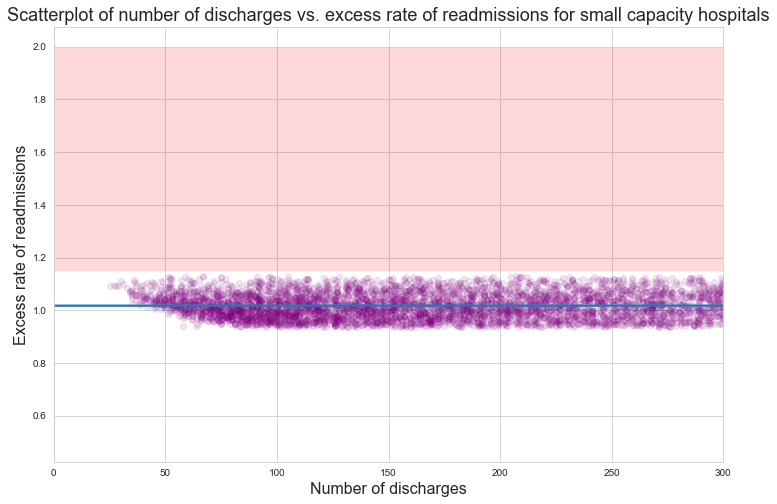

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax = sns.regplot(x=outrmsm['Number of Discharges'], y=outrmsm['Excess Readmission Ratio'], ci=99, \
                 scatter_kws={'alpha':.1, 'color':'purple'}, fit_reg=True)

ax.set_xlim([0, max(outrmsm['Number of Discharges'])])
ax.set_xlabel('Number of discharges', fontsize=16)
ax.set_ylabel('Excess rate of readmissions', fontsize=16)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions for small capacity hospitals', fontsize=18)

plt.setp(ax.collections[1], alpha=0.4)

plt.plot()